In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifierlassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 6)

This dataset contain 150 rows and 6 columns.

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

This dataset contain ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species'] columns.

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values in that dataset.

In [8]:
df.duplicated().sum()

0

There are no duplicate values in that dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


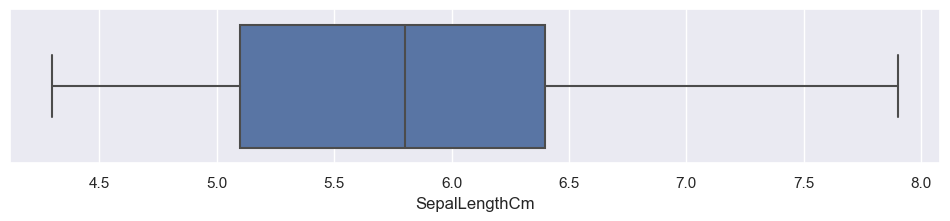

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


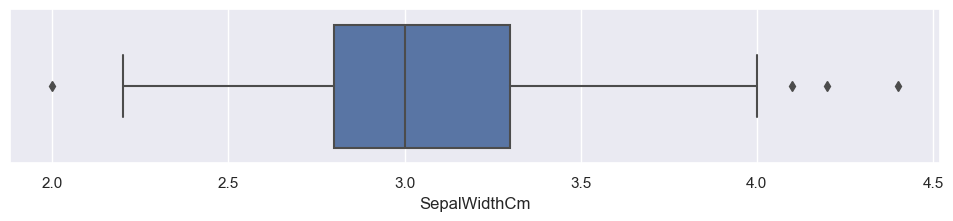

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


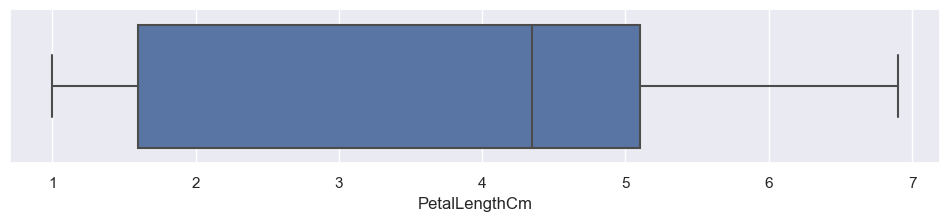

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


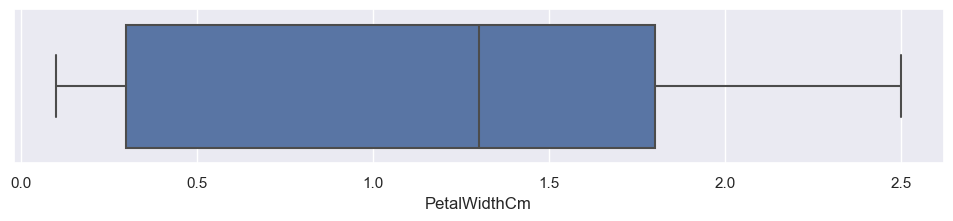

In [11]:
y = df.columns

for x in y:
    
    if (x == 'Id' or x == 'Species'):
        continue

    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(df[x])
    plt.show()

There some outlier values in that dataset.

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

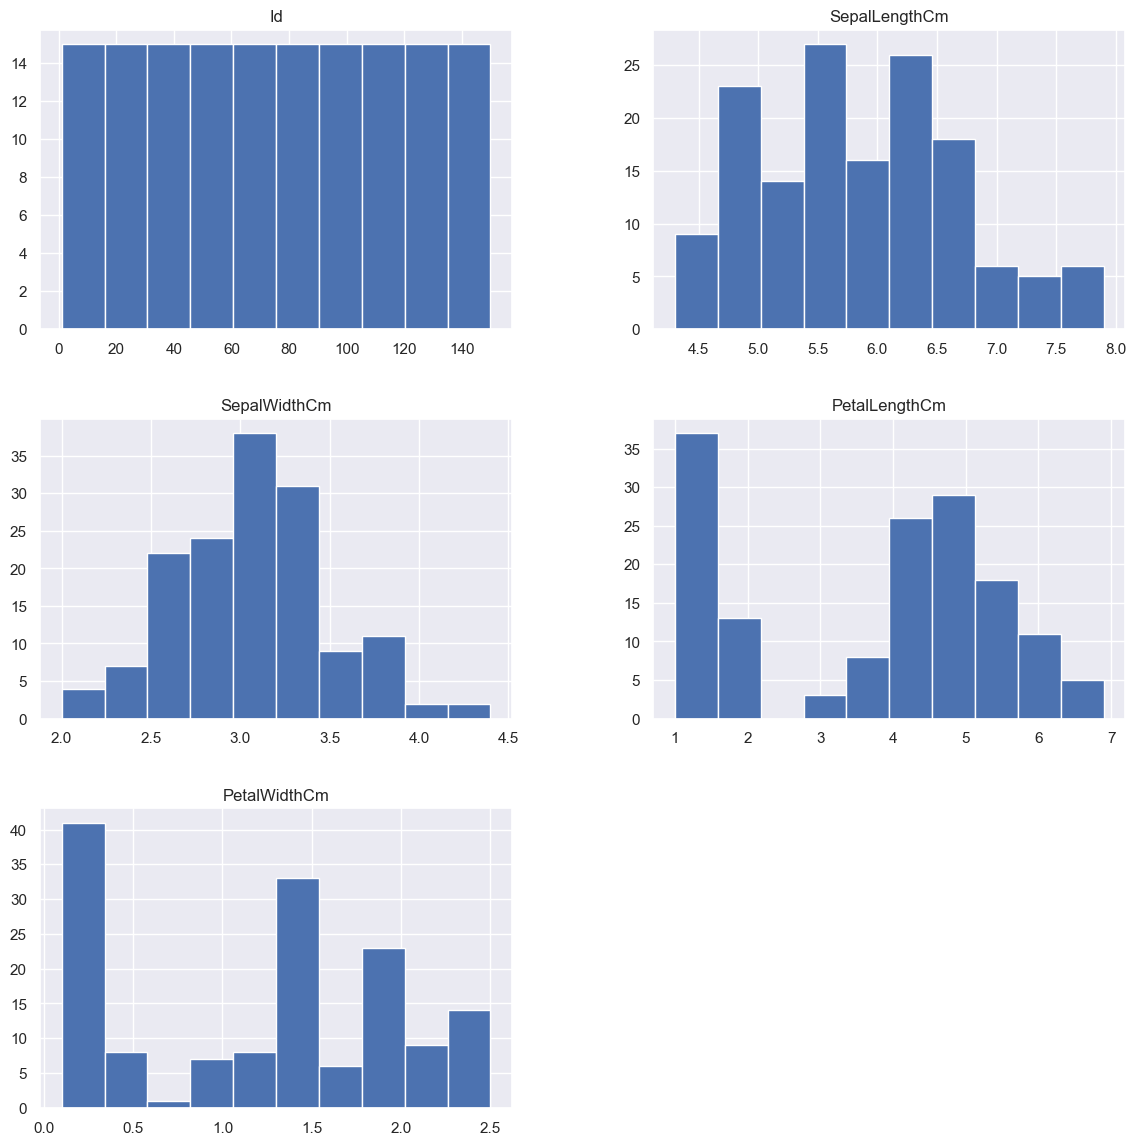

In [17]:
df.hist(figsize = (14, 14))

In [18]:
sns.pairplot(df, height = 20)

Now convert catogarical values into numerical values.

In [12]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
df.replace({'Species' : {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}}, inplace = True)

In [14]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [15]:
df.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0


Now drop the 'Id' column.

In [16]:
df.drop(columns = 'Id', inplace = True)

df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
23,5.1,3.3,1.7,0.5,0
96,5.7,2.9,4.2,1.3,1
58,6.6,2.9,4.6,1.3,1


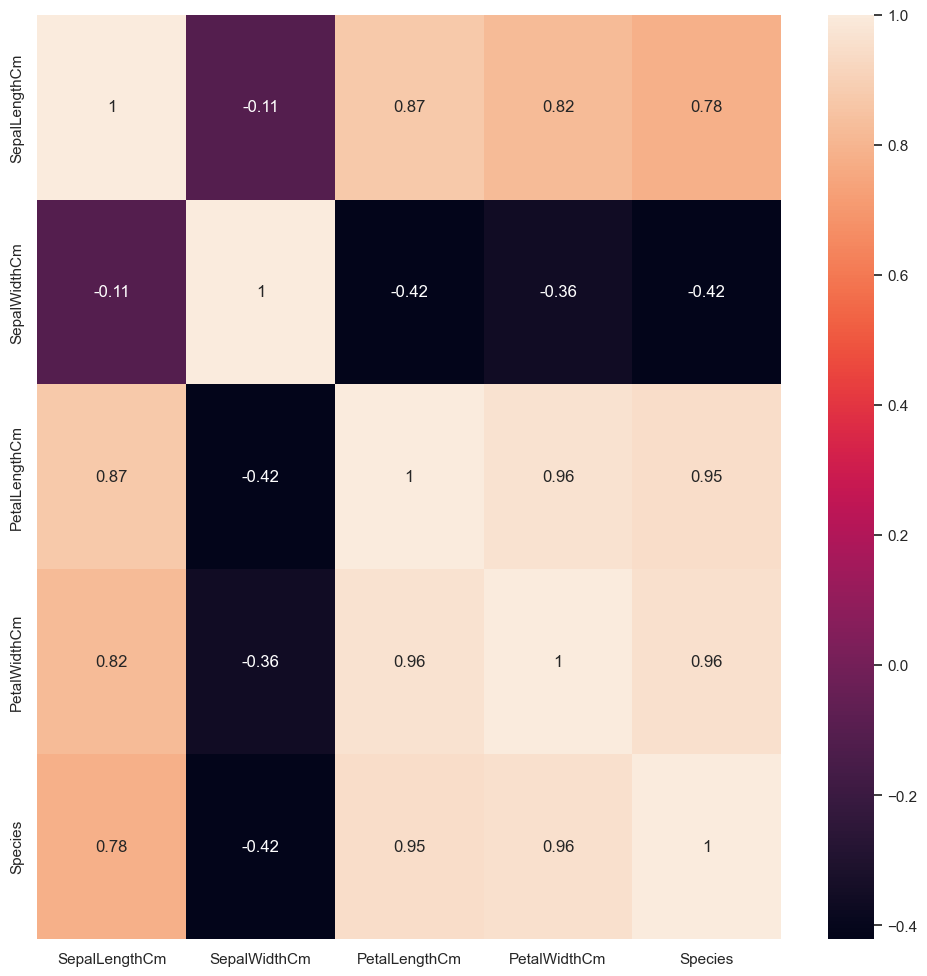

In [17]:
sns.set()
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True)
plt.show()

Now split dataset into x and y variables

In [18]:
x = df.drop(columns = 'Species')
y = df['Species']

In [19]:
x.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
117,7.7,3.8,6.7,2.2
131,7.9,3.8,6.4,2.0
20,5.4,3.4,1.7,0.2


In [20]:
y.sample(3)

57     1
27     0
139    2
Name: Species, dtype: int64

In [21]:
x.shape

(150, 4)

x variable has 150 rows and 4 columns.

In [22]:
y.shape

(150,)

y variable has 150 rows and 1 column.

Now split into x and y variables into train and test data.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 3)

In [24]:
print(x_train.shape)
print("x_train has 120 rows and 4 columns")
print(y_train.shape)
print("y_train has 120 rows and 1 column")
print(x_test.shape)
print("x_train has 30 rows and 4 columns")
print(y_test.shape)
print("x_train has 30 rows and 1 columns")

(120, 4)
x_train has 120 rows and 4 columns
(120,)
y_train has 120 rows and 1 column
(30, 4)
x_train has 30 rows and 4 columns
(30,)
x_train has 30 rows and 1 columns


In [25]:
sc = StandardScaler()

sc.fit(x_train)

StandardScaler()

In [26]:
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [27]:
x_train = pd.DataFrame(x_train ,columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
x_test = pd.DataFrame(x_test, columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

In [28]:
print(x_train.sample(2))
print("-----------------------------------------------------------------------------------------------------------")
print(x_test.sample(2))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
70        0.204432      0.785019       0.425159      0.536706
110      -0.424589     -1.558320      -0.031899     -0.255155
-----------------------------------------------------------------------------------------------------------
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
1       -1.556827      0.082017      -1.288809     -1.310970
27      -0.047177     -0.855319       0.196630     -0.255155


In [29]:
print(x_train.std())
print("------------------------------------------------------------------------------------------------------------------")
print(x_test.std())

SepalLengthCm    1.004193
SepalWidthCm     1.004193
PetalLengthCm    1.004193
PetalWidthCm     1.004193
dtype: float64
------------------------------------------------------------------------------------------------------------------
SepalLengthCm    1.198655
SepalWidthCm     1.073588
PetalLengthCm    1.040692
PetalWidthCm     1.035945
dtype: float64


# Linear Regression Model

In [30]:
lnr = LinearRegression()
lnr.fit(x_train, y_train)

LinearRegression()

In [31]:
linear_traindata_prediction = np.round(lnr.predict(x_train)).astype(int)
linear_testdata_prediction = np.round(lnr.predict(x_test)).astype(int)

linear_traindata_accuracy = accuracy_score(y_train, linear_traindata_prediction)
linear_testdata_accuracy = accuracy_score(y_test, linear_testdata_prediction)

print("Train accuracy for linear regression model", linear_traindata_accuracy)
print("Test accuracy for linear regression model", linear_testdata_accuracy)

Train accuracy for linear regression model 0.9583333333333334
Test accuracy for linear regression model 0.9666666666666667


# Logistic Regression Model

In [32]:
lgr = LogisticRegression()
lgr.fit(x_train, y_train)

LogisticRegression()

In [33]:
logistic_traindata_prediction = lgr.predict(x_train)
logistic_testdata_prediction = lgr.predict(x_test)

logistic_traindata_accuracy = accuracy_score(y_train, logistic_traindata_prediction)
logistic_testdata_accuracy = accuracy_score(y_test, logistic_testdata_prediction)

print("Train accuracy for logistic regression model", logistic_traindata_accuracy)
print("Test accuracy for logistic regression model", logistic_testdata_accuracy)

Train accuracy for logistic regression model 0.9583333333333334
Test accuracy for logistic regression model 1.0


# KNeighbors Regression

In [35]:
correct_sum = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    correct = np.sum(pred == y_test)
    correct_sum.append(correct)

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [36]:
correct_sum

[28, 29, 28, 29, 29, 30, 29, 30, 29, 29, 29, 30, 29, 29, 29, 29, 29, 29, 29]

In [41]:
result = pd.DataFrame(data = correct_sum)
result.index = result.index + 1
result.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,28,29,28,29,29,30,29,30,29,29,29,30,29,29,29,29,29,29,29


Let's use i = 8.

In [42]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [43]:
knn_traindata_prediction = knn.predict(x_train)
knn_testdata_prediction = knn.predict(x_test)

knn_traindata_accuracy = accuracy_score(y_train, knn_traindata_prediction)
knn_testdata_accuracy = accuracy_score(y_test, knn_testdata_prediction)

print("Train accuracy for KNeighbors regression model", knn_traindata_accuracy)
print("Test accuracy for KNeighbors regression model", knn_testdata_accuracy)

Train accuracy for KNeighbors regression model 0.95
Test accuracy for KNeighbors regression model 1.0


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# Data prediction

In [45]:
def func (prediction):
    if (prediction == 0):
        print("You entered details about Iris-setosa")
    elif (prediction == 1):
        print("You entered details about Iris-versicolor")
    elif (prediction == 2):
        print("You entered details about Iris-virginica")

In [46]:
SepalLengthCm = 5.1
SepalWidthCm = 3.5 
PetalLengthCm = 1.4
PetalWidthCm = 0.2

input_data = (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm)
input_arr = np.asarray(input_data).reshape(1, -1)

lnr_prediction = np.round(lnr.predict(input_arr)).astype(int)
lgr_prediction = lgr.predict(input_arr)
knn_prediction = knn.predict(input_arr)

func(knn_prediction)

You entered details about Iris-virginica


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k